In [ ]:
!pip install opencv-contrib-python
!pip install caer

     |████████████████████████████████| 809 kB 5.3 MB/s 
     |████████████████████████████████| 14.0 MB 32.9 MB/s 
     |████████████████████████████████| 843 kB 41.1 MB/s 


In [ ]:
from google.colab import files
import io
#Installing Simpsons DataSet
# To get from kaggle  
files.upload()
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download alexattia/the-simpsons-characters-dataset

# Installing `caer` and `canaro` since they don't come pre-installed
!pip install --upgrade caer canaro

Saving kaggle.json to kaggle.json
100% 1.08G/1.08G [00:09<00:00, 116MB/s]
100% 1.08G/1.08G [00:09<00:00, 123MB/s]
     |████████████████████████████████| 462 kB 7.2 MB/s 


Streaming output truncated to the last 5000 lines.
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1352.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1353.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1354.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1355.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1356.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1357.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1358.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1359.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1360.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1361.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1362.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1363.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pi

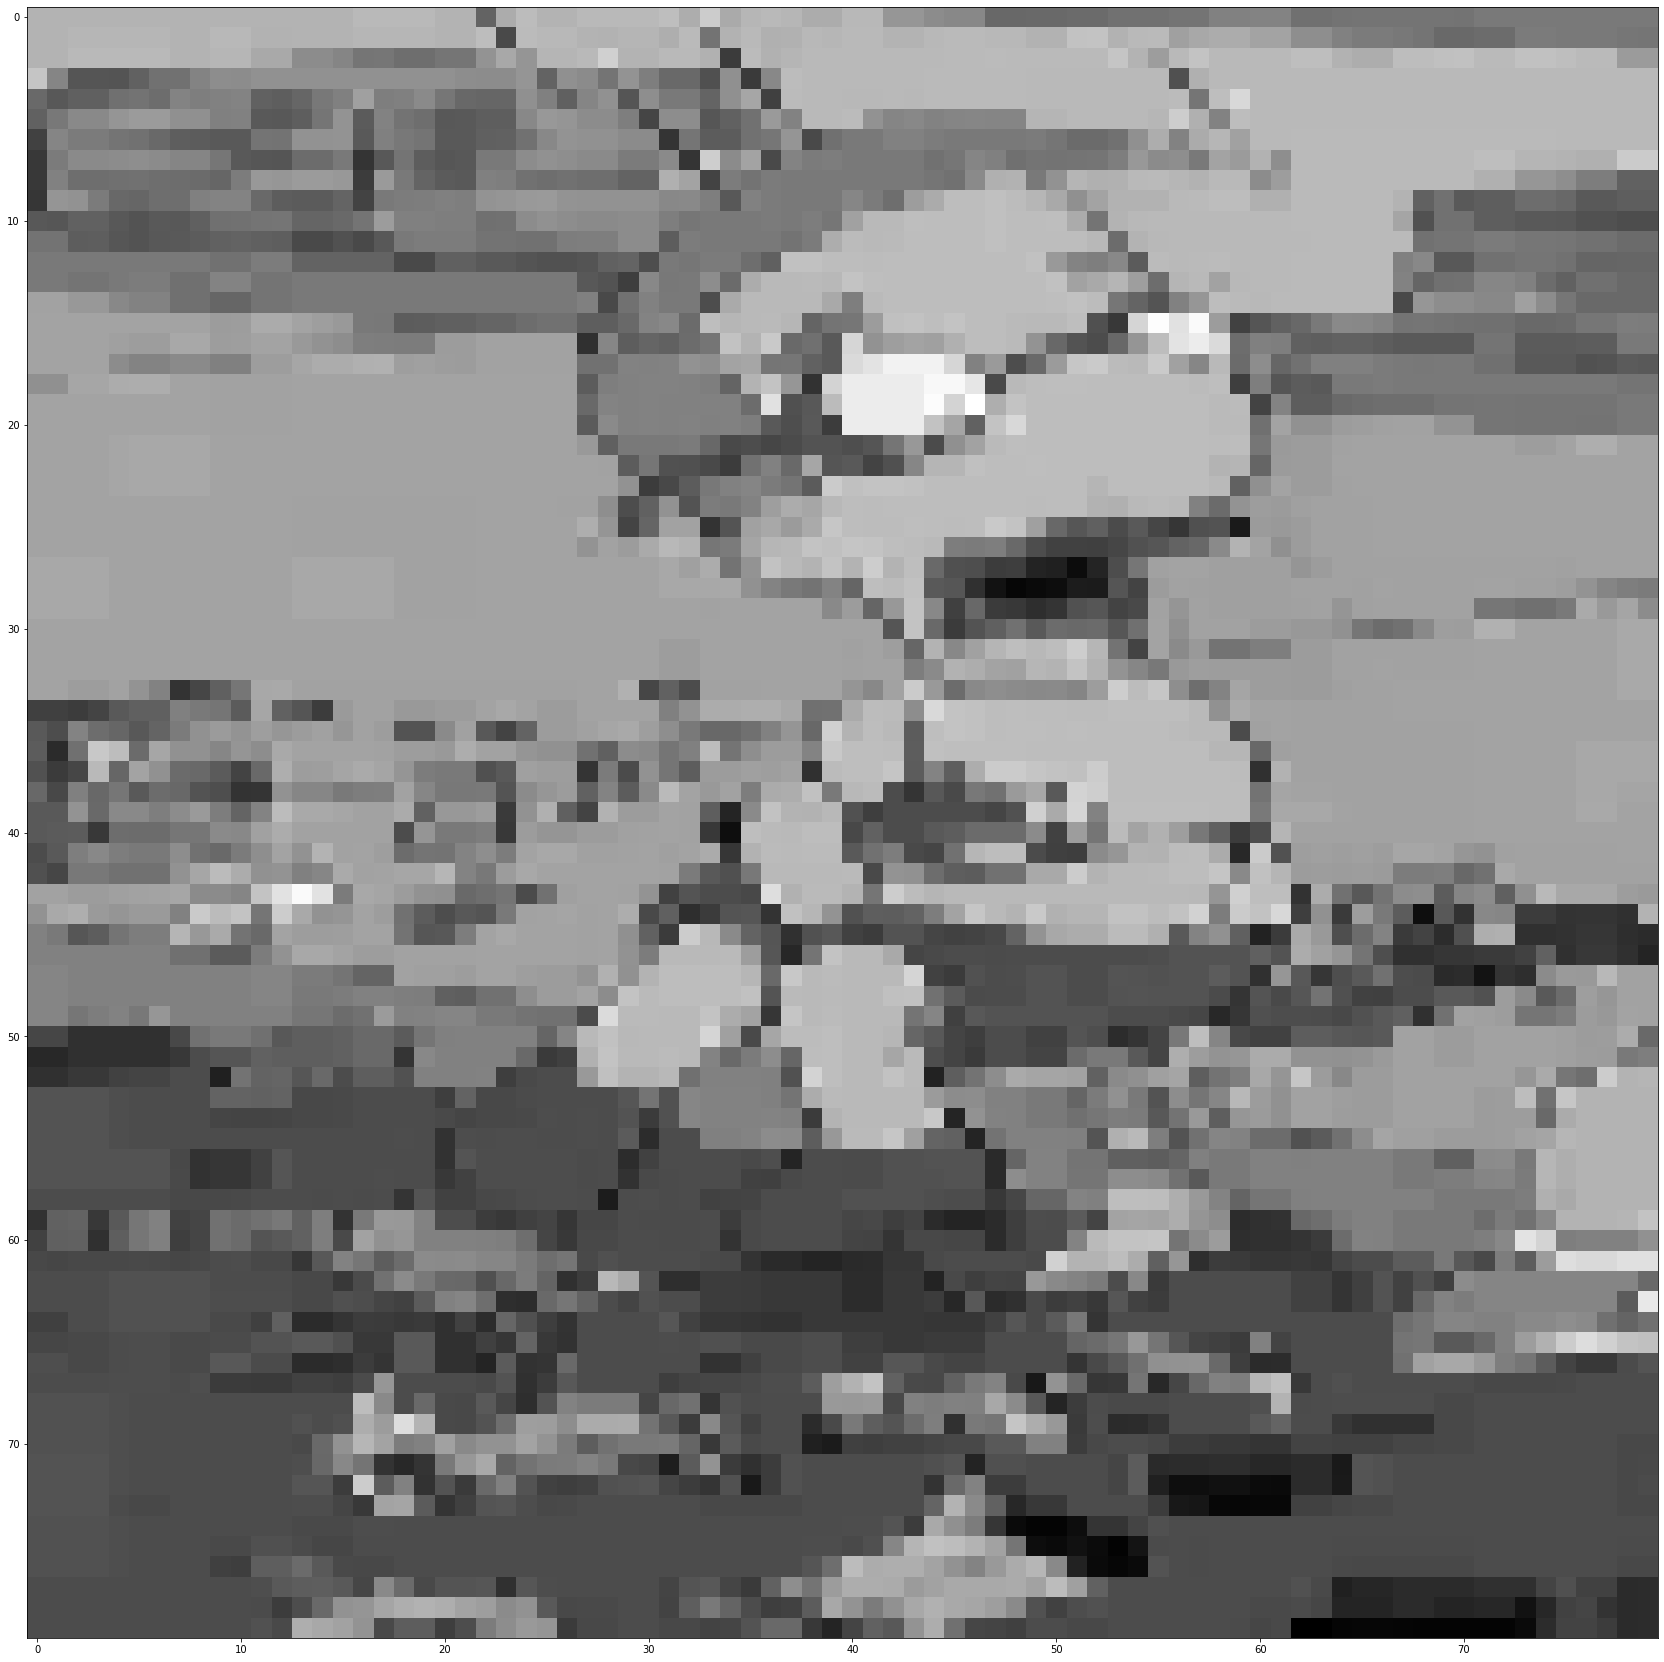

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 80, 80, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 78, 78, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 39, 39, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 39, 39, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 39, 39, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 37, 37, 64)        36928     
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
323/323 [==============================] - 37s 80ms/step - loss: 0.3420 - accuracy: 0.1501 - val_loss: 0.3347 - val_accuracy: 0.1755 - lr: 0.0100
Epoch 2/10
323/323 [==============================] - 20s 61ms/step - loss: 0.3240 - accuracy: 0.1569 - lr: 0.0100
Epoch 3/10
323/323 [==============================] - 20s 61ms/step - loss: 0.3229 - accuracy: 0.1587 - lr: 0.0100
Epoch 4/10
323/323 [==============================] - 20s 61ms/step - loss: 0.3153 - accuracy: 0.1930 - lr: 0.0100
Epoch 5/10
323/323 [==============================] - 20s 61ms/step - loss: 0.3066 - accuracy: 0.2341 - lr: 0.0100
Epoch 6/10
323/323 [==============================] - 19s 60ms/step - loss: 0.3041 - accuracy: 0.2526 - lr: 0.0100
Epoch 7/10
323/323 [==============================] - 20s 61ms/step - loss: 0.3012 - accuracy: 0.2609 - lr: 0.0100
Epoch 8/10
323/323 [==============================] - 20s 61ms/step - loss: 0.2986 - accuracy: 0.2702 - lr: 0.0100
Epoch 9/10
323/323 [==================

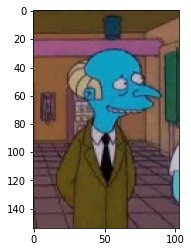

lisa_simpson


In [ ]:
#UNZIPPING KAGGLE DATA SET WE DOWNLOADED
!unzip the-simpsons-characters-dataset.zip
!ls
#Detecting Simpsons Face
#pylint:disable=no-member (Removes linting problems with cv)

# Installing `caer` and `canaro` since they don't come pre-installed
# Uncomment the following line:
!pip install --upgrade caer canaro

import os
import caer
import canaro
import numpy as np
import cv2 as cv
import gc
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split

IMG_SIZE = (80,80)
channels = 1
char_path = 'simpsons_dataset/simpsons_dataset'

# Creating a character dictionary, sorting it in descending order
char_dict = {}
for char in os.listdir(char_path):
    char_dict[char] = len(os.listdir(os.path.join(char_path,char)))

# Sort in descending order
char_dict = caer.sort_dict(char_dict, descending=True)
print(char_dict)

#  Getting the first 10 categories with the most number of images
characters = []
count = 0
for i in char_dict:
    characters.append(i[0])
    count += 1
    if count >= 10:
        break
print(characters)

# Create the training data
train = caer.preprocess_from_dir(char_path, characters, channels=channels, IMG_SIZE=IMG_SIZE, isShuffle=True)

# Number of training samples
len(train)

# Visualizing the data (OpenCV doesn't display well in Jupyter notebooks)
plt.figure(figsize=(30,30))
plt.imshow(train[0][0], cmap='gray')
plt.show()

# Separating the array and corresponding labels
featureSet, labels = caer.sep_train(train, IMG_SIZE=IMG_SIZE)


# Normalize the featureSet ==> (0,1)
featureSet = caer.normalize(featureSet)
# Converting numerical labels to binary class vectors
labels = to_categorical(labels, len(characters))


# Creating train and validation data
x_train, x_val, y_train, y_val = train_test_split(featureSet, labels)

# Deleting variables to save memory
del train
del featureSet
del labels 
gc.collect()

# Useful variables when training
BATCH_SIZE = 32
EPOCHS = 10

# Image data generator (introduces randomness in network ==> better accuracy)
datagen = canaro.generators.imageDataGenerator()
train_gen = datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

# Create our model (returns the compiled model)
model = canaro.models.createSimpsonsModel(IMG_SIZE=IMG_SIZE, channels=channels, output_dim=len(characters), 
                                         loss='binary_crossentropy', decay=1e-7, learning_rate=0.001, momentum=0.9,
                                         nesterov=True)

model.summary()

# Training the model

callbacks_list = [LearningRateScheduler(canaro.lr_schedule)]
training = model.fit(train_gen,
                    steps_per_epoch=len(x_train)//BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(x_val,y_val),
                    validation_steps=len(y_val)//BATCH_SIZE,
                    callbacks = callbacks_list)

print(characters)


"""## Testing"""

test_path = 'kaggle_simpson_testset/kaggle_simpson_testset/charles_montgomery_burns_0.jpg'

img = cv.imread(test_path)

plt.imshow(img)
plt.show()

def prepare(image):
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    image = cv.resize(image, IMG_SIZE)
    image = caer.reshape(image, IMG_SIZE, 1)
    return image

predictions = model.predict(prepare(img))

# Getting class with the highest probability
print(characters[np.argmax(predictions[0])])